In [693]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [694]:
df_green_other=pd.read_csv(r"D:\Sociometrik\income_and_expenditue_prediction\DataOnHexgridFor_5_cities.csv")

In [695]:
df_green_other.columns

Index(['hexid08', 't_name', 'locality', 'green_space_density',
       'luxery_percentage', 'business_facility', 'cinema', 'golf_course',
       'ice_skating_rink', 'museum', 'nightlife', 'sports_centre',
       'bar_or_pub', 'coffee_shop', 'restaurant', 'clothing_store',
       'consumer_electronics_store', 'convenience_store', 'department_store',
       'grocery_store', 'home_improvement_hardware_store',
       'home_specialty_store', 'shopping', 'sporting_goods_store', 'hotel'],
      dtype='object')

In [696]:
print(df_green_other.shape)
df_green_other.head(3)

(6423, 25)


,hexid08,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,...,clothing_store,consumer_electronics_store,convenience_store,department_store,grocery_store,home_improvement_hardware_store,home_specialty_store,shopping,sporting_goods_store,hotel
0,883cf28945fffff,Kolkata,Sinthi,0.08606,0.24424,8,0,0,0,0,...,25,46,3,3,45,6,5,0,0,0
1,883cf28949fffff,Kolkata,Baranagar,0.16975,0.30973,43,0,0,0,0,...,10,1,23,23,0,13,1,0,0,0
2,883cf2894dfffff,Kolkata,Baranagar,0.31128,0.46927,11,0,0,0,0,...,14,17,6,6,18,0,1,0,0,0


In [697]:
df_rent=pd.read_excel(r"D:\Sociometrik\income_and_expenditue_prediction\Predicted_rent.xlsx")
print(df_rent.shape)
df_rent.head(2)

(6423, 4)


,hexid08,t_name,locality,avg_mon_reside _rent_price
0,8861892633fffff,Bengaluru,Vittasandra,11.53000
1,886189268dfffff,Bengaluru,Hullahalli,18.67000


In [698]:
df_exp=pd.read_csv(r"D:\Sociometrik\income_and_expenditue_prediction\5cities_digital_expenditure.csv")
df_exp.head(2)

,hexid08,t_name,consumer_digital_expenditure
0,883da10ac1fffff,Delhi,59906
1,883da186e7fffff,Delhi,12868


In [699]:
df_wp=pd.read_csv(r"D:\Sociometrik\income_and_expenditue_prediction\working professinal data\working_profestional data.csv")

In [700]:
df_wp.head()

,hexid08,town,sm_segment,working_pro_for_segment_in_hexid08
0,886014416dfffff,Bengaluru,Working Professionals,2
1,8860144261fffff,Bengaluru,Working Professionals,14
2,8860144265fffff,Bengaluru,Working Professionals,34
3,8860144269fffff,Bengaluru,Working Professionals,9
4,886014426dfffff,Bengaluru,Working Professionals,14


In [701]:
merged_df = df_green_other.merge(df_rent, on=['hexid08','t_name','locality'], how='left')
merged_df = merged_df.merge(df_exp, on=['hexid08','t_name'], how='left')
merged_df = merged_df.merge(df_wp, on='hexid08', how='left')

In [702]:
print(merged_df.shape)
merged_df.head(3)

(6423, 30)


,hexid08,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,...,home_improvement_hardware_store,home_specialty_store,shopping,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,town,sm_segment,working_pro_for_segment_in_hexid08
0,883cf28945fffff,Kolkata,Sinthi,0.08606,0.24424,8,0,0,0,0,...,6,5,0,0,0,13.49000,52567,Kolkata,Working Professionals,1964.00000
1,883cf28949fffff,Kolkata,Baranagar,0.16975,0.30973,43,0,0,0,0,...,13,1,0,0,0,10.00000,49186,Kolkata,Working Professionals,1964.00000
2,883cf2894dfffff,Kolkata,Baranagar,0.31128,0.46927,11,0,0,0,0,...,0,1,0,0,0,10.58000,44932,Kolkata,Working Professionals,763.00000


In [703]:
merged_df=merged_df.drop(columns=['town','sm_segment'])
print(merged_df.shape)
merged_df.head(2)

(6423, 28)


,hexid08,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,...,department_store,grocery_store,home_improvement_hardware_store,home_specialty_store,shopping,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08
0,883cf28945fffff,Kolkata,Sinthi,0.08606,0.24424,8,0,0,0,0,...,3,45,6,5,0,0,0,13.49000,52567,1964.00000
1,883cf28949fffff,Kolkata,Baranagar,0.16975,0.30973,43,0,0,0,0,...,23,0,13,1,0,0,0,10.00000,49186,1964.00000


In [704]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 6422
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   hexid08                             6423 non-null   object 
 1   t_name                              6423 non-null   object 
 2   locality                            6423 non-null   object 
 3   green_space_density                 6423 non-null   float64
 4   luxery_percentage                   5926 non-null   float64
 5   business_facility                   6423 non-null   int64  
 6   cinema                              6423 non-null   int64  
 7   golf_course                         6423 non-null   int64  
 8   ice_skating_rink                    6423 non-null   int64  
 9   museum                              6423 non-null   int64  
 10  nightlife                           6423 non-null   int64  
 11  sports_centre                       6423 no

In [705]:
agg_loc=merged_df.groupby(['t_name','locality']).mean()
agg_loc=agg_loc.reset_index()

C:\Users\chemi\AppData\Local\Temp\ipykernel_13984\3957257029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_loc=merged_df.groupby(['t_name','locality']).mean()


In [706]:
print(agg_loc.shape)
agg_loc.head(2)

(1528, 27)


,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,...,department_store,grocery_store,home_improvement_hardware_store,home_specialty_store,shopping,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08
0,Bengaluru,Aanchepalya Village,0.09000,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,3.00000,1.00000,0.00000,0.00000,1.00000,27.65000,664146.00000,220.00000
1,Bengaluru,Aavalahalli,0.01333,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.33333,1.55556,0.22222,0.00000,0.11111,0.00000,13.69222,55829.55556,210.66667


In [707]:
agg_loc=agg_loc.set_index(['t_name','locality'])
print(agg_loc.shape)
agg_loc.head(2)

(1528, 25)


green_space_density  luxery_percentage  \
t_name    locality                                                      
Bengaluru Aanchepalya Village              0.09000            0.56376   
          Aavalahalli                      0.01333            0.42101   

                               business_facility  cinema  golf_course  \
t_name    locality                                                      
Bengaluru Aanchepalya Village            6.00000 0.00000      0.00000   
          Aavalahalli                    3.33333 0.00000      0.00000   

                               ice_skating_rink  museum  nightlife  \
t_name    locality                                                   
Bengaluru Aanchepalya Village           0.00000 0.00000    0.00000   
          Aavalahalli                   0.00000 0.00000    0.00000   

                               sports_centre  bar_or_pub  ...  \
t_name    locality                                        ...   
Bengaluru Aanchepalya Village        0.00000     1.00000  ...   
          Aavalahalli                0.00000     0.11111  ...   

                               department_store  grocery_store  \
t_name    locality                                               
Bengaluru Aanchepalya Village           0.00000        0.00000   
          Aavalahalli                   0.00000        0.33333   

                               home_improvement_hardware_store  \
t_name    locality                                               
Bengaluru Aanchepalya Village                          3.00000   
          Aavalahalli                                  1.55556   

                               home_specialty_store  shopping  \
t_name    locality                                              
Bengaluru Aanchepalya Village               1.00000   0.00000   
          Aavalahalli                       0.22222   0.00000   

                               sporting_goods_store   hotel  \
t_name    locality                                            
Bengaluru Aanchepalya Village               0.00000 1.00000   
          Aavalahalli                       0.11111 0.00000   

                               avg_mon_reside _rent_price  \
t_name    locality                                          
Bengaluru Aanchepalya Village                    27.65000   
          Aavalahalli                            13.69222   

                               consumer_digital_expenditure  \
t_name    locality                                            
Bengaluru Aanchepalya Village                  664146.00000   
          Aavalahalli                           55829.55556   

                               working_pro_for_segment_in_hexid08  
t_name    locality                                                 
Bengaluru Aanchepalya Village                           220.00000  
          Aavalahalli                                   210.66667  

[2 rows x 25 columns]

In [708]:
agg_loc.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1528 entries, ('Bengaluru', 'Aanchepalya Village') to ('Mumbai', 'kandiwali East')
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   green_space_density                 1528 non-null   float64
 1   luxery_percentage                   1507 non-null   float64
 2   business_facility                   1528 non-null   float64
 3   cinema                              1528 non-null   float64
 4   golf_course                         1528 non-null   float64
 5   ice_skating_rink                    1528 non-null   float64
 6   museum                              1528 non-null   float64
 7   nightlife                           1528 non-null   float64
 8   sports_centre                       1528 non-null   float64
 9   bar_or_pub                          1528 non-null   float64
 10  coffee_shop                         1528 non-null

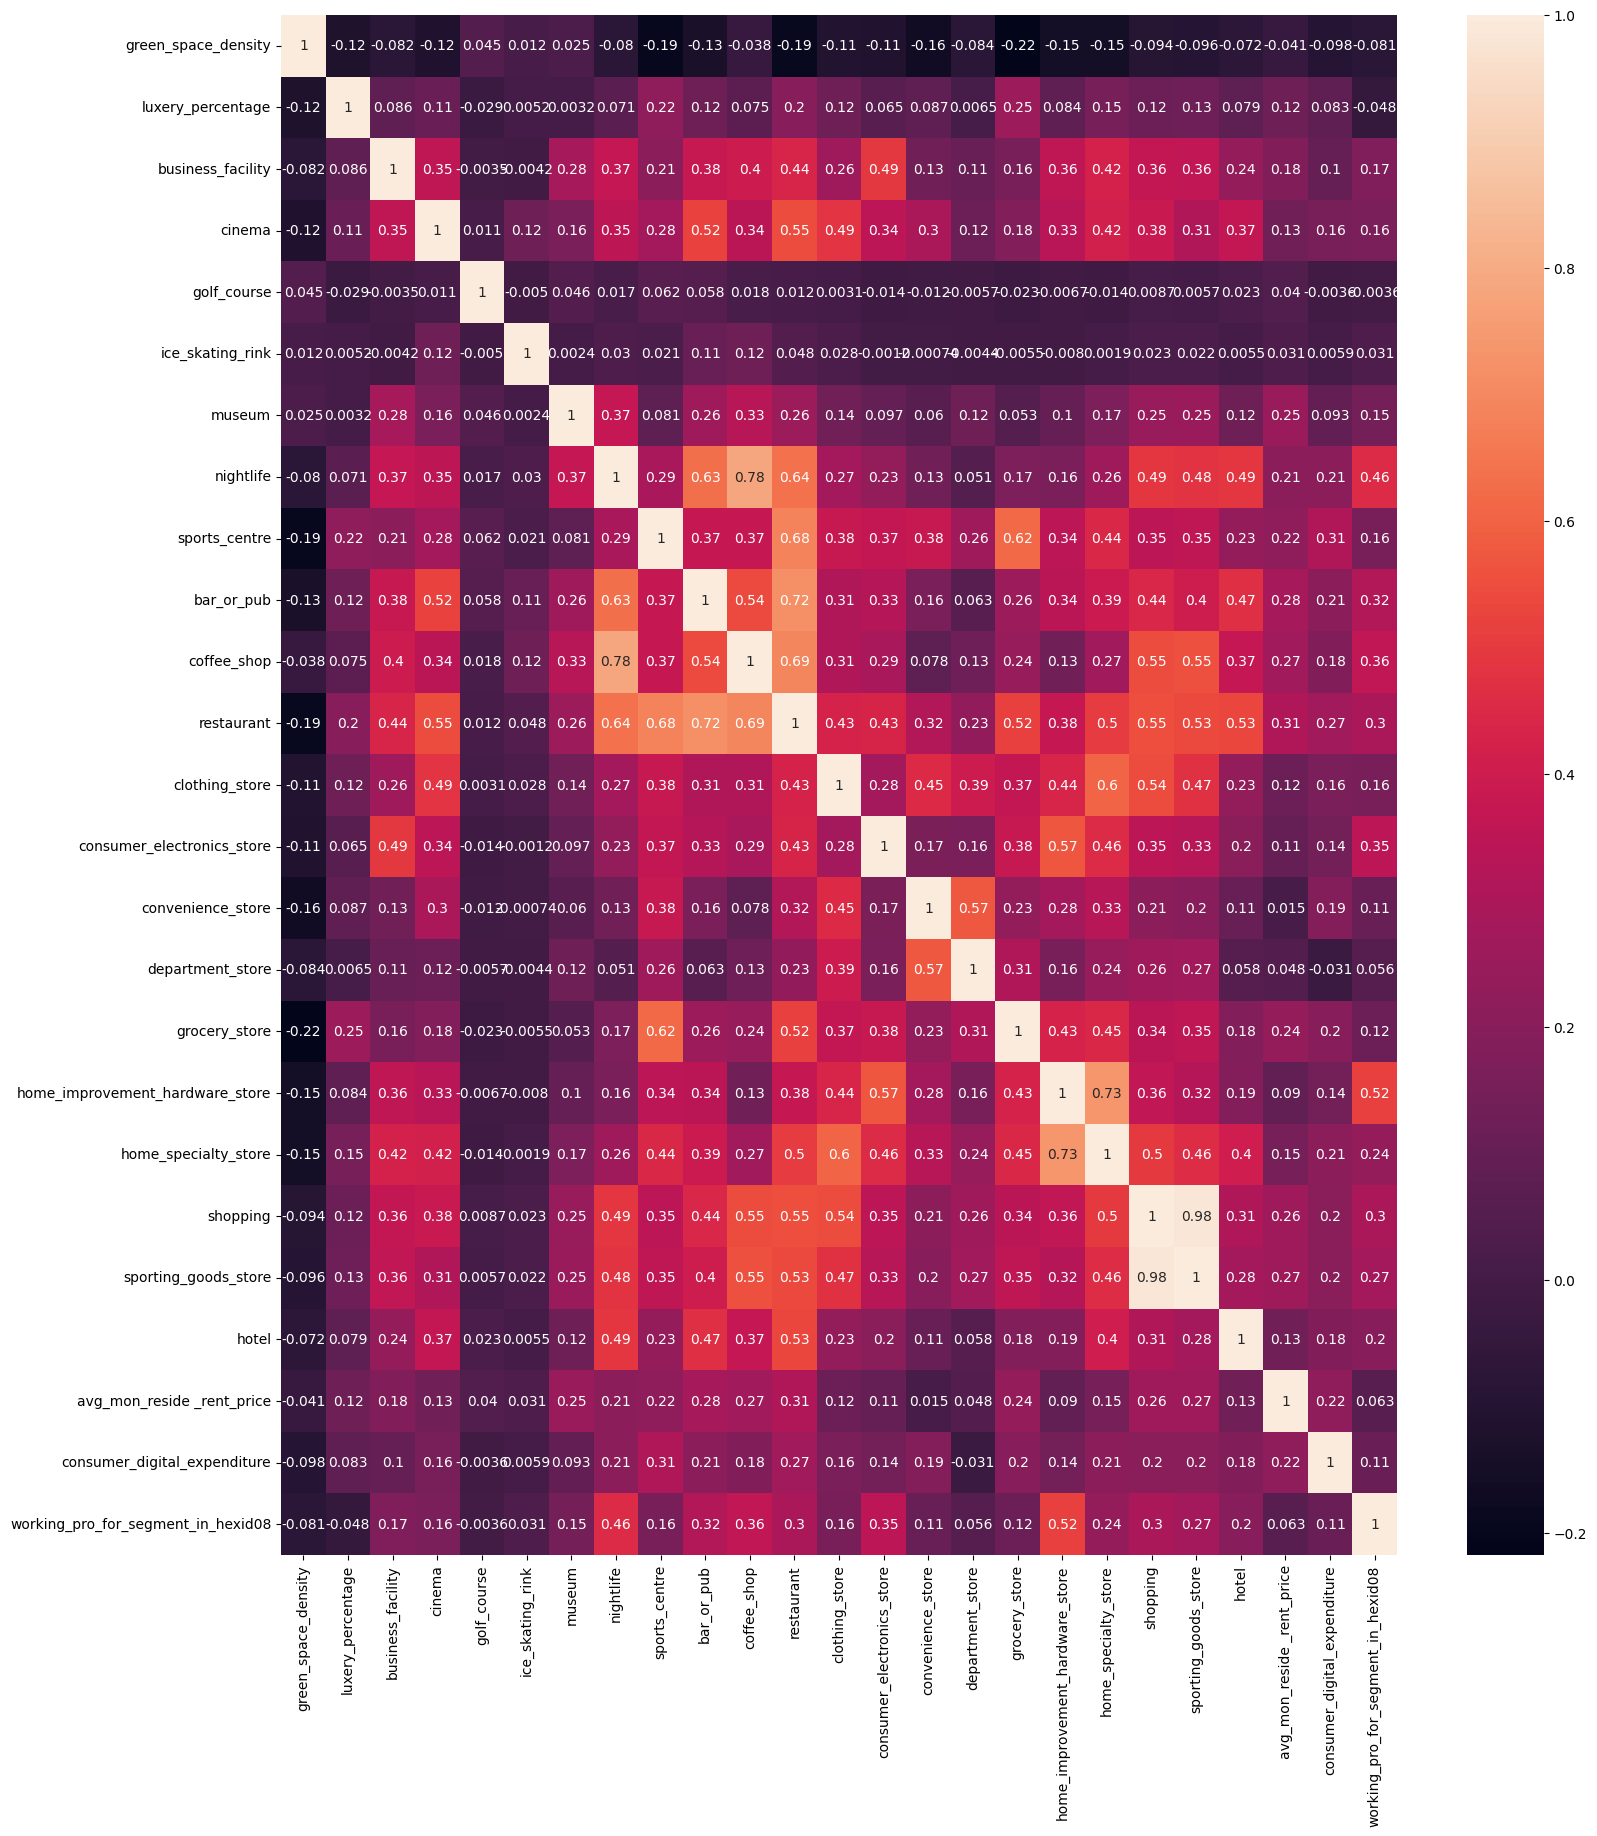

In [709]:
plt.figure(figsize=(18,20))
sns.heatmap(agg_loc.corr(),annot=True)
plt.show()

# for Income

In [710]:
agg_loc_inc=agg_loc

In [711]:
agg_loc_inc=agg_loc_inc.dropna()

In [712]:
agg_loc_inc.shape

(1507, 25)

In [713]:
agg_loc_inc

green_space_density  luxery_percentage  \
t_name    locality                                                      
Bengaluru Aanchepalya Village              0.09000            0.56376   
          Aavalahalli                      0.01333            0.42101   
          Abbigere                         0.22333            0.34167   
          Adakamaranahalli                 0.07000            0.32250   
          Adarsh Palm Retreat              0.00000            0.38997   
...                                            ...                ...   
Mumbai    Vile Parle East                  0.00405            0.40275   
          Vile Parle West                  0.00348            0.46968   
          Wadala                           0.02450            0.48797   
          Worli                            0.00630            0.52385   
          kandiwali East                   0.01349            0.56819   

                               business_facility  cinema  golf_course  \
t_name    locality                                                      
Bengaluru Aanchepalya Village            6.00000 0.00000      0.00000   
          Aavalahalli                    3.33333 0.00000      0.00000   
          Abbigere                       6.33333 0.00000      0.00000   
          Adakamaranahalli               2.00000 0.00000      0.00000   
          Adarsh Palm Retreat           43.66667 1.33333      0.00000   
...                                          ...     ...          ...   
Mumbai    Vile Parle East               91.33333 0.26667      0.00000   
          Vile Parle West              234.00000 0.00000      0.00000   
          Wadala                        14.00000 0.00000      0.00000   
          Worli                        332.57143 0.71429      0.00000   
          kandiwali East               116.25000 0.41667      0.00000   

                               ice_skating_rink  museum  nightlife  \
t_name    locality                                                   
Bengaluru Aanchepalya Village           0.00000 0.00000    0.00000   
          Aavalahalli                   0.00000 0.00000    0.00000   
          Abbigere                      0.00000 0.00000    0.00000   
          Adakamaranahalli              0.00000 0.00000    0.00000   
          Adarsh Palm Retreat           0.33333 0.00000    0.00000   
...                                         ...     ...        ...   
Mumbai    Vile Parle East               0.00000 0.00000    1.33333   
          Vile Parle West               0.00000 0.00000    1.00000   
          Wadala                        0.00000 0.00000    0.33333   
          Worli                         0.14286 0.71429    2.71429   
          kandiwali East                0.00000 0.00000    0.58333   

                               sports_centre  bar_or_pub  ...  \
t_name    locality                                        ...   
Bengaluru Aanchepalya Village        0.00000     1.00000  ...   
          Aavalahalli                0.00000     0.11111  ...   
          Abbigere                   0.33333     0.00000  ...   
          Adakamaranahalli           0.00000     0.00000  ...   
          Adarsh Palm Retreat        1.00000     0.66667  ...   
...                                      ...         ...  ...   
Mumbai    Vile Parle East            1.53333     2.20000  ...   
          Vile Parle West            2.50000     5.00000  ...   
          Wadala                     1.50000     0.66667  ...   
          Worli                      3.71429     6.42857  ...   
          kandiwali East             3.33333     1.58333  ...   

                               department_store  grocery_store  \
t_name    locality                                               
Bengaluru Aanchepalya Village           0.00000        0.00000   
          Aavalahalli                   0.00000        0.33333   
          Abbigere                      0.00000        0.00000   
          Adakamaranahalli              0.00

In [714]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(agg_loc_inc)

In [715]:
df = pd.DataFrame(df_sc)
# Apply PCA
pca = PCA(n_components=1)  
pca.fit(df)

# Get the transformed data
transformed_data = pca.transform(df)

In [716]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
transformed_data

array([[-0.8380498 ],
       [-1.29249261],
       [-1.40496404],
       ...,
       [ 0.53760969],
       [ 4.55089187],
       [ 1.14097526]])

In [717]:
agg_loc_inc['pca_income']=transformed_data

C:\Users\chemi\AppData\Local\Temp\ipykernel_13984\1551944864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_loc_inc['pca_income']=transformed_data


In [718]:
agg_loc_inc=agg_loc_inc.reset_index()

In [719]:
from sklearn.preprocessing import MinMaxScaler
MMsc = MinMaxScaler()
pre=MMsc.fit_transform(transformed_data)
for i,j in agg_loc_inc.groupby('t_name'):
    print(i)
    pre=pd.DataFrame(j['pca_income'])
    transform=MMsc.fit_transform(pre)
    print(pre)
    len=j.shape[0]
    print(len)
    transform=transform.reshape(1,len)[0]
    print(transform)

    
    

Bengaluru
     pca_income
0      -0.83805
1      -1.29249
2      -1.40496
3      -1.34569
4       0.78587
..          ...
568    -1.30416
569    -1.10678
570    -0.76269
571    -1.21387
572     2.29687

[573 rows x 1 columns]
573
[0.03069518 0.01509545 0.01123462 0.01326947 0.0864399  0.00968947
 0.02521037 0.12126698 0.0135206  0.01807108 0.0104882  0.01524623
 0.0381096  0.01188365 0.01801933 0.00744347 0.05955239 0.00802618
 0.01417561 0.02693404 0.02548532 0.09407787 0.02719714 0.03387158
 0.01483278 0.01223    0.03328405 0.05245678 0.37225203 0.00867663
 0.11852786 0.02416782 0.03115653 0.1567035  0.01379831 0.06653038
 0.01450853 0.0925519  0.13009246 0.14458182 0.05135237 0.0110777
 0.00827002 0.01409607 0.02402019 0.2355632  0.02863523 0.
 0.18623617 0.14037351 0.01387889 0.02599826 0.02202585 0.03867225
 0.01846124 0.01404803 0.03473409 0.01276473 0.15597548 0.055628
 0.06109691 0.01606948 0.01708853 0.01339846 0.01656235 0.03403491
 0.01412887 0.01273645 0.01335225 0.01320881

In [720]:
from sklearn.preprocessing import MinMaxScaler
MMsc = MinMaxScaler()

for group_name, group_data in agg_loc_inc.groupby('t_name'):
    # Extract 'pca' data for the current group
    current_pca = group_data['pca_income'].values.reshape(-1, 1)

    # Transform the data using the previously fitted scaler
    transformed_data = MMsc.fit_transform(current_pca).reshape(1, -1)[0]

    # Update 'min_max' column for the current group in agg_loc
    agg_loc_inc.loc[agg_loc_inc['t_name'] == group_name, 'min_max_inc'] = transformed_data


In [721]:
town_inc_exp=pd.read_excel(r"D:\Sociometrik\income_and_expenditue_prediction\5Citites_town_level_income&expen.xlsx")

In [722]:
town_inc_exp.head(5)

,City,Indicator,Value,Unit
0,Bengaluru,Total Income,2407733.62061,Rs. Crores
1,Bengaluru,Total Expenditure,1283148.97798,Rs. Crores
2,Gurugram,Total Income,451195.01016,Rs. Crores
3,Gurugram,Total Expenditure,237217.93853,Rs. Crores
4,Kolkata,Total Income,400681.13221,Rs. Crores


In [723]:
agg_loc_inc=agg_loc_inc.merge(town_inc_exp[town_inc_exp['Indicator']=="Total Income"][['City','Value','Unit']],how='left',left_on="t_name", right_on="City")

In [724]:
agg_loc_inc=agg_loc_inc.drop(columns=['City'])
agg_loc_inc=agg_loc_inc.rename(columns={"Value":'total_income_of_city'})

In [725]:
agg_loc_inc.head(2)

,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,...,shopping,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08,pca_income,min_max_inc,total_income_of_city,Unit
0,Bengaluru,Aanchepalya Village,0.09000,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,27.65000,664146.00000,220.00000,-0.83805,0.03070,2407733.62061,Rs. Crores
1,Bengaluru,Aavalahalli,0.01333,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.11111,0.00000,13.69222,55829.55556,210.66667,-1.29249,0.01510,2407733.62061,Rs. Crores


In [726]:
for group_name, group_data in agg_loc_inc.groupby('t_name'):
    # Extract 'pca' data for the current group
    income_value=group_data['min_max_inc'].apply(lambda x : ((x/group_data['min_max_inc'].sum())*group_data["total_income_of_city"].mean()))
    income_value=income_value.values
    agg_loc_inc.loc[agg_loc_inc['t_name'] == group_name, 'income_on_locality'] = income_value


In [727]:
agg_loc_inc

,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,...,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08,pca_income,min_max_inc,total_income_of_city,Unit,income_on_locality
0,Bengaluru,Aanchepalya Village,0.09000,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,27.65000,664146.00000,220.00000,-0.83805,0.03070,2407733.62061,Rs. Crores,2947.11670
1,Bengaluru,Aavalahalli,0.01333,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.11111,0.00000,13.69222,55829.55556,210.66667,-1.29249,0.01510,2407733.62061,Rs. Crores,1449.34959
2,Bengaluru,Abbigere,0.22333,0.34167,6.33333,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,10.97667,193268.33333,556.00000,-1.40496,0.01123,2407733.62061,Rs. Crores,1078.66267
3,Bengaluru,Adakamaranahalli,0.07000,0.32250,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,24.40000,2433.50000,162.50000,-1.34569,0.01327,2407733.62061,Rs. Crores,1274.03283
4,Bengaluru,Adarsh Palm Retreat,0.00000,0.38997,43.66667,1.33333,0.00000,0.33333,0.00000,0.00000,...,0.00000,1.33333,27.20000,268418.00000,1872.00000,0.78587,0.08644,2407733.62061,Rs. Crores,8299.29903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,Mumbai,Vile Parle East,0.00405,0.40275,91.33333,0.26667,0.00000,0.00000,0.00000,1.33333,...,0.20000,4.66667,80.39067,1552135.80000,4170.40000,1.04505,0.15599,2218627.76835,Rs. Crores,15695.76896
1503,Mumbai,Vile Parle West,0.00348,0.46968,234.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,9.50000,4.50000,97.82500,1592718.00000,6243.00000,4.38590,0.35278,2218627.76835,Rs. Crores,35497.09785
1504,Mumbai,Wadala,0.02450,0.48797,14.00000,0.00000,0.00000,0.00000,0.00000,0.33333,...,1.16667,0.50000,72.47167,1550544.16667,1945.16667,0.53761,0.12610,2218627.76835,Rs. Crores,12688.18523
1505,Mumbai,Worli,0.00630,0.52385,332.57143,0.71429,0.00000,0.14286,0.71429,2.71429,...,8.42857,1.85714,111.43714,1002386.85714,5030.28571,4.55089,0.36250,2218627.76835,Rs. Crores,36475.00691


In [728]:
agg_loc_inc.to_csv(r"D:\Sociometrik\income_and_expenditue_prediction\predicted\income_prediction_for_5cities.csv")

# for expenditue

In [729]:
# brand_and_non_brand_df=pd.read_csv(r"D:\Sociometrik\income_and_expenditue_prediction\count_of_poi_brand&non-brand.csv")

In [730]:
# brand_and_non_brand_df.head(10)

In [731]:
# map_df=df_green_other[["hexid08","t_name","locality"]]

In [732]:
# brand_and_non_brand_df.shape

In [733]:
# brand_and_non_brand_df=pd.merge(brand_and_non_brand_df,map_df, how="left",on='hexid08')
# brand_and_non_brand_df= brand_and_non_brand_df[["hexid08",'t_name','locality','brand&non-brand','poi']]
# brand_and_non_brand_df.head(2)

In [734]:
# ap=brand_and_non_brand_df.groupby(['t_name','locality','brand&non-brand']).agg({'poi':'sum'}).reset_index()

In [735]:
# ap.to_csv(r"D:\Sociometrik\income_and_expenditue_prediction\check.csv")

In [736]:
agg_loc_exp=agg_loc.drop(columns=['green_space_density'])

In [737]:
agg_loc_exp

luxery_percentage  business_facility  cinema  \
t_name    locality                                                            
Bengaluru Aanchepalya Village            0.56376            6.00000 0.00000   
          Aavalahalli                    0.42101            3.33333 0.00000   
          Abbigere                       0.34167            6.33333 0.00000   
          Adakamaranahalli               0.32250            2.00000 0.00000   
          Adarsh Palm Retreat            0.38997           43.66667 1.33333   
...                                          ...                ...     ...   
Mumbai    Vile Parle East                0.40275           91.33333 0.26667   
          Vile Parle West                0.46968          234.00000 0.00000   
          Wadala                         0.48797           14.00000 0.00000   
          Worli                          0.52385          332.57143 0.71429   
          kandiwali East                 0.56819          116.25000 0.41667   

                               golf_course  ice_skating_rink  museum  \
t_name    locality                                                     
Bengaluru Aanchepalya Village      0.00000           0.00000 0.00000   
          Aavalahalli              0.00000           0.00000 0.00000   
          Abbigere                 0.00000           0.00000 0.00000   
          Adakamaranahalli         0.00000           0.00000 0.00000   
          Adarsh Palm Retreat      0.00000           0.33333 0.00000   
...                                    ...               ...     ...   
Mumbai    Vile Parle East          0.00000           0.00000 0.00000   
          Vile Parle West          0.00000           0.00000 0.00000   
          Wadala                   0.00000           0.00000 0.00000   
          Worli                    0.00000           0.14286 0.71429   
          kandiwali East           0.00000           0.00000 0.00000   

                               nightlife  sports_centre  bar_or_pub  \
t_name    locality                                                    
Bengaluru Aanchepalya Village    0.00000        0.00000     1.00000   
          Aavalahalli            0.00000        0.00000     0.11111   
          Abbigere               0.00000        0.33333     0.00000   
          Adakamaranahalli       0.00000        0.00000     0.00000   
          Adarsh Palm Retreat    0.00000        1.00000     0.66667   
...                                  ...            ...         ...   
Mumbai    Vile Parle East        1.33333        1.53333     2.20000   
          Vile Parle West        1.00000        2.50000     5.00000   
          Wadala                 0.33333        1.50000     0.66667   
          Worli                  2.71429        3.71429     6.42857   
          kandiwali East         0.58333        3.33333     1.58333   

                               coffee_shop  ...  department_store  \
t_name    locality                          ...                     
Bengaluru Aanchepalya Village      0.00000  ...           0.00000   
          Aavalahalli              0.00000  ...           0.00000   
          Abbigere                 0.00000  ...           0.00000   
          Adakamaranahalli         0.00000  ...           0.00000   
          Adarsh Palm Retreat      1.00000  ...           0.00000   
...                                    ...  ...               ...   
Mumbai    Vile Parle East          2.33333  ...           0.20000   
          Vile Parle West          5.00000  ...           2.00000   
          Wadala                   0.16667  ...           0.16667   
          Worli                    1.85714  ...           0.57143   
          kandiwali East           0.66667  ...           1.83333   

                               grocery_store  home_improvement_hardware_store  \
t_name    locality                                                              
Bengaluru Aanchepalya Village        0.00000                          3.00000   
 

In [738]:
agg_loc_exp=agg_loc_exp.dropna()

In [739]:
agg_loc_exp.shape

(1507, 24)

In [740]:
agg_loc_exp

luxery_percentage  business_facility  cinema  \
t_name    locality                                                            
Bengaluru Aanchepalya Village            0.56376            6.00000 0.00000   
          Aavalahalli                    0.42101            3.33333 0.00000   
          Abbigere                       0.34167            6.33333 0.00000   
          Adakamaranahalli               0.32250            2.00000 0.00000   
          Adarsh Palm Retreat            0.38997           43.66667 1.33333   
...                                          ...                ...     ...   
Mumbai    Vile Parle East                0.40275           91.33333 0.26667   
          Vile Parle West                0.46968          234.00000 0.00000   
          Wadala                         0.48797           14.00000 0.00000   
          Worli                          0.52385          332.57143 0.71429   
          kandiwali East                 0.56819          116.25000 0.41667   

                               golf_course  ice_skating_rink  museum  \
t_name    locality                                                     
Bengaluru Aanchepalya Village      0.00000           0.00000 0.00000   
          Aavalahalli              0.00000           0.00000 0.00000   
          Abbigere                 0.00000           0.00000 0.00000   
          Adakamaranahalli         0.00000           0.00000 0.00000   
          Adarsh Palm Retreat      0.00000           0.33333 0.00000   
...                                    ...               ...     ...   
Mumbai    Vile Parle East          0.00000           0.00000 0.00000   
          Vile Parle West          0.00000           0.00000 0.00000   
          Wadala                   0.00000           0.00000 0.00000   
          Worli                    0.00000           0.14286 0.71429   
          kandiwali East           0.00000           0.00000 0.00000   

                               nightlife  sports_centre  bar_or_pub  \
t_name    locality                                                    
Bengaluru Aanchepalya Village    0.00000        0.00000     1.00000   
          Aavalahalli            0.00000        0.00000     0.11111   
          Abbigere               0.00000        0.33333     0.00000   
          Adakamaranahalli       0.00000        0.00000     0.00000   
          Adarsh Palm Retreat    0.00000        1.00000     0.66667   
...                                  ...            ...         ...   
Mumbai    Vile Parle East        1.33333        1.53333     2.20000   
          Vile Parle West        1.00000        2.50000     5.00000   
          Wadala                 0.33333        1.50000     0.66667   
          Worli                  2.71429        3.71429     6.42857   
          kandiwali East         0.58333        3.33333     1.58333   

                               coffee_shop  ...  department_store  \
t_name    locality                          ...                     
Bengaluru Aanchepalya Village      0.00000  ...           0.00000   
          Aavalahalli              0.00000  ...           0.00000   
          Abbigere                 0.00000  ...           0.00000   
          Adakamaranahalli         0.00000  ...           0.00000   
          Adarsh Palm Retreat      1.00000  ...           0.00000   
...                                    ...  ...               ...   
Mumbai    Vile Parle East          2.33333  ...           0.20000   
          Vile Parle West          5.00000  ...           2.00000   
          Wadala                   0.16667  ...           0.16667   
          Worli                    1.85714  ...           0.57143   
          kandiwali East           0.66667  ...           1.83333   

                               grocery_store  home_improvement_hardware_store  \
t_name    locality                                                              
Bengaluru Aanchepalya Village        0.00000                          3.00000   
 

In [741]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(agg_loc_exp)

In [742]:
df = pd.DataFrame(df_sc)
# Apply PCA
pca = PCA(n_components=1)  
pca.fit(df)

# Get the transformed data
transformed_data = pca.transform(df)

In [743]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
transformed_data

array([[-0.87115339],
       [-1.35872942],
       [-1.38067308],
       ...,
       [ 0.47960681],
       [ 4.50604348],
       [ 1.07747611]])

In [744]:
agg_loc_exp['pca_exp']=transformed_data

C:\Users\chemi\AppData\Local\Temp\ipykernel_13984\1843167427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_loc_exp['pca_exp']=transformed_data


In [745]:
agg_loc_exp=agg_loc_exp.reset_index()

In [746]:
from sklearn.preprocessing import MinMaxScaler
MMsc = MinMaxScaler()
pre=MMsc.fit_transform(transformed_data)
for i,j in agg_loc_exp.groupby('t_name'):
    print(i)
    pre=pd.DataFrame(j['pca_exp'])
    transform=MMsc.fit_transform(pre)
    print(pre)
    len=j.shape[0]
    print(len)
    transform=transform.reshape(1,len)[0]
    print(transform)


Bengaluru
     pca_exp
0   -0.87115
1   -1.35873
2   -1.38067
3   -1.38652
4    0.72265
..       ...
568 -1.31971
569 -1.14630
570 -0.81549
571 -1.27780
572  2.25087

[573 rows x 1 columns]
573
[2.47494386e-02 7.93060051e-03 7.17365815e-03 6.97208017e-03
 7.97273650e-02 2.82527368e-03 1.83382777e-02 1.14446022e-01
 7.88355388e-03 1.54315265e-02 3.36457852e-03 8.85886169e-03
 3.20215612e-02 9.85941260e-03 1.24306109e-02 4.67556905e-03
 5.28297529e-02 4.20770628e-03 8.34636574e-03 2.01847716e-02
 1.84925207e-02 8.89543421e-02 2.25180758e-02 2.88665473e-02
 7.43101794e-03 6.07413123e-03 2.76426988e-02 4.87462820e-02
 3.69838412e-01 3.37816914e-03 1.12055495e-01 1.79453992e-02
 2.70179435e-02 1.50941159e-01 1.34331674e-02 6.02523976e-02
 7.30140903e-03 8.63154890e-02 1.23836263e-01 1.38332156e-01
 4.49058095e-02 4.93612336e-03 7.67989362e-03 9.25631263e-03
 1.77499925e-02 2.30508496e-01 2.50794873e-02 0.00000000e+00
 1.80025946e-01 1.33976810e-01 8.59586571e-03 1.93523212e-02
 1.76912343e-

In [747]:
from sklearn.preprocessing import MinMaxScaler
MMsc = MinMaxScaler()

for group_name, group_data in agg_loc_exp.groupby('t_name'):
    # Extract 'pca' data for the current group
    current_pca = group_data['pca_exp'].values.reshape(-1, 1)

    # Transform the data using the previously fitted scaler
    transformed_data = MMsc.fit_transform(current_pca).reshape(1, -1)[0]

    # Update 'min_max' column for the current group in agg_loc
    agg_loc_exp.loc[agg_loc_exp['t_name'] == group_name, 'min_max_exp'] = transformed_data


In [748]:
agg_loc_exp

,t_name,locality,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,sports_centre,...,home_improvement_hardware_store,home_specialty_store,shopping,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08,pca_exp,min_max_exp
0,Bengaluru,Aanchepalya Village,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,3.00000,1.00000,0.00000,0.00000,1.00000,27.65000,664146.00000,220.00000,-0.87115,0.02475
1,Bengaluru,Aavalahalli,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.55556,0.22222,0.00000,0.11111,0.00000,13.69222,55829.55556,210.66667,-1.35873,0.00793
2,Bengaluru,Abbigere,0.34167,6.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.33333,...,3.00000,0.00000,0.00000,0.00000,0.00000,10.97667,193268.33333,556.00000,-1.38067,0.00717
3,Bengaluru,Adakamaranahalli,0.32250,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,24.40000,2433.50000,162.50000,-1.38652,0.00697
4,Bengaluru,Adarsh Palm Retreat,0.38997,43.66667,1.33333,0.00000,0.33333,0.00000,0.00000,1.00000,...,4.33333,3.66667,1.00000,0.00000,1.33333,27.20000,268418.00000,1872.00000,0.72265,0.07973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,Mumbai,Vile Parle East,0.40275,91.33333,0.26667,0.00000,0.00000,0.00000,1.33333,1.53333,...,13.13333,2.73333,0.20000,0.20000,4.66667,80.39067,1552135.80000,4170.40000,0.98299,0.15428
1503,Mumbai,Vile Parle West,0.46968,234.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.50000,...,36.50000,16.50000,9.50000,9.50000,4.50000,97.82500,1592718.00000,6243.00000,4.33542,0.35143
1504,Mumbai,Wadala,0.48797,14.00000,0.00000,0.00000,0.00000,0.00000,0.33333,1.50000,...,8.33333,3.16667,1.16667,1.16667,0.50000,72.47167,1550544.16667,1945.16667,0.47961,0.12468
1505,Mumbai,Worli,0.52385,332.57143,0.71429,0.00000,0.14286,0.71429,2.71429,3.71429,...,12.85714,16.14286,8.42857,8.42857,1.85714,111.43714,1002386.85714,5030.28571,4.50604,0.36146


In [749]:
town_inc_exp.head(5)

,City,Indicator,Value,Unit
0,Bengaluru,Total Income,2407733.62061,Rs. Crores
1,Bengaluru,Total Expenditure,1283148.97798,Rs. Crores
2,Gurugram,Total Income,451195.01016,Rs. Crores
3,Gurugram,Total Expenditure,237217.93853,Rs. Crores
4,Kolkata,Total Income,400681.13221,Rs. Crores


In [750]:
agg_loc_exp=agg_loc_exp.merge(town_inc_exp[town_inc_exp['Indicator']=="Total Expenditure"][['City','Value','Unit']],how='left',left_on="t_name", right_on="City")

In [751]:
agg_loc_exp=agg_loc_exp.drop(columns=['City'])
agg_loc_exp=agg_loc_exp.rename(columns={"Value":'total_expenditure_of_city'})

In [752]:
agg_loc_exp.head(2)

,t_name,locality,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,sports_centre,...,shopping,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08,pca_exp,min_max_exp,total_expenditure_of_city,Unit
0,Bengaluru,Aanchepalya Village,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,27.65000,664146.00000,220.00000,-0.87115,0.02475,1283148.97798,Rs. Crores
1,Bengaluru,Aavalahalli,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.11111,0.00000,13.69222,55829.55556,210.66667,-1.35873,0.00793,1283148.97798,Rs. Crores


In [753]:
for group_name, group_data in agg_loc_exp.groupby('t_name'):
    # Extract 'pca' data for the current group
    expenditure_value=group_data['min_max_exp'].apply(lambda x : ((x/group_data['min_max_exp'].sum())*group_data["total_expenditure_of_city"].mean()))
    expenditure_value=expenditure_value.values
    agg_loc_exp.loc[agg_loc_exp['t_name'] == group_name, 'expenditure_on_locality'] = expenditure_value


In [754]:
agg_loc_exp.head(2)

,t_name,locality,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,sports_centre,...,sporting_goods_store,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08,pca_exp,min_max_exp,total_expenditure_of_city,Unit,expenditure_on_locality
0,Bengaluru,Aanchepalya Village,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,27.65000,664146.00000,220.00000,-0.87115,0.02475,1283148.97798,Rs. Crores,1448.89696
1,Bengaluru,Aavalahalli,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.11111,0.00000,13.69222,55829.55556,210.66667,-1.35873,0.00793,1283148.97798,Rs. Crores,464.27813


In [755]:
income_and_expen_df=pd.merge(agg_loc_inc,agg_loc_exp[['t_name','locality','expenditure_on_locality']],how='inner',on=['t_name','locality'])

In [756]:
income_and_expen_df.head(2)

,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,...,hotel,avg_mon_reside _rent_price,consumer_digital_expenditure,working_pro_for_segment_in_hexid08,pca_income,min_max_inc,total_income_of_city,Unit,income_on_locality,expenditure_on_locality
0,Bengaluru,Aanchepalya Village,0.09000,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,27.65000,664146.00000,220.00000,-0.83805,0.03070,2407733.62061,Rs. Crores,2947.11670,1448.89696
1,Bengaluru,Aavalahalli,0.01333,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,13.69222,55829.55556,210.66667,-1.29249,0.01510,2407733.62061,Rs. Crores,1449.34959,464.27813


In [757]:
income_and_expen_df["expenditue percentage"]=(income_and_expen_df['expenditure_on_locality']/income_and_expen_df['income_on_locality'])*100

In [758]:
for i in income_and_expen_df['t_name'].unique():
    df_desc=income_and_expen_df[income_and_expen_df['t_name']==i]
    print('\n\n')
    print("-----",i,'------')
    print(df_desc[['income_on_locality','expenditure_on_locality','expenditue percentage']].describe())
    print("3.5th quantile \n", df_desc[['income_on_locality','expenditure_on_locality','expenditue percentage']].quantile(0.035))
    print('\n')
    print("96.5th quantile \n",df_desc[['income_on_locality','expenditure_on_locality','expenditue percentage']].quantile(0.965))




----- Bengaluru ------
       income_on_locality  expenditure_on_locality  expenditue percentage
count           573.00000                573.00000              572.00000
mean           4201.97840               2239.35249               44.09224
std            6956.84552               4247.53241               11.22722
min               0.00000                  0.00000                6.92169
25%            1255.99247                444.14498               35.45729
50%            1805.11154                780.04274               45.31241
75%            4003.39720               2107.21994               53.69943
max           96012.36756              58542.61942               69.15125
3.5th quantile 
 income_on_locality        765.56994
expenditure_on_locality   206.68600
expenditue percentage      22.79199
Name: 0.035, dtype: float64


96.5th quantile 
 income_on_locality        17850.84163
expenditure_on_locality   10521.13096
expenditue percentage        59.13569
Name: 0.965, dtype: f

In [759]:
# Filter and update the values for each town where "expenditure percentage" is less than 30
for town, town_df in income_and_expen_df.groupby('t_name'):
    print(town)
    min_index=town_df[town_df["expenditue percentage"] > 30]['expenditue percentage'].idxmin()
    print(min_index)
    for i in town_df[town_df["expenditue percentage"]<30].index:
        print(income_and_expen_df['income_on_locality'][i])
        income_and_expen_df['income_on_locality'][i]= income_and_expen_df['income_on_locality'][min_index]
        print(income_and_expen_df['income_on_locality'][i])
        
        print(income_and_expen_df['expenditure_on_locality'][i])
        income_and_expen_df['expenditure_on_locality'][i]=income_and_expen_df['expenditure_on_locality'][min_index]
        print(income_and_expen_df['expenditure_on_locality'][i])
        
        print("----")
        

Bengaluru
217
930.3091992484584
1168.6724052052418
165.39892199382277
353.08337652572845
----
1006.996631677173
1168.6724052052418
196.97124010160417
353.08337652572845
----
833.0635248230992
1168.6724052052418
197.76687024293656
353.08337652572845
----
1063.5963739275453
1168.6724052052418
288.9735914670136
353.08337652572845
----
1225.5719161756774
1168.6724052052418
337.30111691994034
353.08337652572845
----
1286.4175265107117
1168.6724052052418
357.0861819550084
353.08337652572845
----
1222.8565279388813
1168.6724052052418
341.63633598835077
353.08337652572845
----
1281.980717272314
1168.6724052052418
355.45851335536275
353.08337652572845
----
1180.363122194078
1168.6724052052418
343.14903151561066
353.08337652572845
----
1101.8700848952476
1168.6724052052418
269.4036932015261
353.08337652572845
----
906.7067661433666
1168.6724052052418
206.6579285131027
353.08337652572845
----
866.5571092953936
1168.6724052052418
205.15859468178496
353.08337652572845
----
1126.9564774312103
1168.6

C:\Users\chemi\AppData\Local\Temp\ipykernel_13984\3120189331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_and_expen_df['income_on_locality'][i]= income_and_expen_df['income_on_locality'][min_index]
C:\Users\chemi\AppData\Local\Temp\ipykernel_13984\3120189331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_and_expen_df['expenditure_on_locality'][i]=income_and_expen_df['expenditure_on_locality'][min_index]


In [807]:
# Filter and update the values for each town where "expenditure percentage" is less than 30
for town, town_df in income_and_expen_df.groupby('t_name'):
    print(town)
    max_index=town_df[town_df["expenditue percentage"] < 70]['expenditue percentage'].idxmax()
    print(max_index)
    for i in town_df[town_df["expenditue percentage"]>70].index:
        print(income_and_expen_df['income_on_locality'][i])
        income_and_expen_df['income_on_locality'][i]= income_and_expen_df['income_on_locality'][max_index]
        print(income_and_expen_df['income_on_locality'][i])
        
        print(income_and_expen_df['expenditure_on_locality'][i])
        income_and_expen_df['expenditure_on_locality'][i]=income_and_expen_df['expenditure_on_locality'][max_index]
        print(income_and_expen_df['expenditure_on_locality'][i])
        
        print("----")

Bengaluru
90
Delhi
909
736.3644517552592
225.85333002965635
516.8426616954531
157.94885839589045
----
779.1950776738908
225.85333002965635
706.8135228965424
157.94885839589045
----
635.9861541218836
225.85333002965635
480.96771319340513
157.94885839589045
----
728.5476421847779
225.85333002965635
605.8716093989661
157.94885839589045
----
759.9697298928394
225.85333002965635
550.6248501966459
157.94885839589045
----
307.47687457924224
225.85333002965635
394.792309919409
157.94885839589045
----
746.7528100830344
225.85333002965635
739.1194694724428
157.94885839589045
----
178.25747120373308
225.85333002965635
161.1342409401156
157.94885839589045
----
700.6607715901919
225.85333002965635
589.7697156706229
157.94885839589045
----
704.0816400877677
225.85333002965635
503.1453175867882
157.94885839589045
----
969.8857905278791
225.85333002965635
959.3209969231945
157.94885839589045
----
2156.022152667385
225.85333002965635
1538.4341078359848
157.94885839589045
----
807.395123460325
225.85333

C:\Users\chemi\AppData\Local\Temp\ipykernel_13984\3805259331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_and_expen_df['income_on_locality'][i]= income_and_expen_df['income_on_locality'][max_index]
C:\Users\chemi\AppData\Local\Temp\ipykernel_13984\3805259331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_and_expen_df['expenditure_on_locality'][i]=income_and_expen_df['expenditure_on_locality'][max_index]


In [808]:
income_and_expen_df["expenditue percentage"]=(income_and_expen_df['expenditure_on_locality']/income_and_expen_df['income_on_locality'])*100

In [809]:
for i in income_and_expen_df['t_name'].unique():
    df_desc=income_and_expen_df[income_and_expen_df['t_name']==i]
    print('\n\n')
    print("-----",i,'------')
    print(df_desc[['income_on_locality','expenditure_on_locality','expenditue percentage']].describe())
    print("3.5th quantile \n", df_desc[['income_on_locality','expenditure_on_locality','expenditue percentage']].quantile(0.035))
    print('\n')
    print("96.5th quantile \n",df_desc[['income_on_locality','expenditure_on_locality','expenditue percentage']].quantile(0.965))




----- Bengaluru ------
       income_on_locality  expenditure_on_locality  expenditue percentage
count           573.00000                573.00000              572.00000
mean           4216.23779               2250.33580               44.78283
std            6950.18801               4242.42399               10.00326
min               0.00000                  0.00000               30.21235
25%            1201.05203                444.14498               35.45729
50%            1805.11154                780.04274               45.31241
75%            4003.39720               2107.21994               53.69943
max           96012.36756              58542.61942               69.15125
3.5th quantile 
 income_on_locality        868.35207
expenditure_on_locality   343.29739
expenditue percentage      30.21235
Name: 0.035, dtype: float64


96.5th quantile 
 income_on_locality        17850.84163
expenditure_on_locality   10521.13096
expenditue percentage        59.13569
Name: 0.965, dtype: f

In [811]:
income_and_expen_df.to_csv(r'D:\Sociometrik\income_and_expenditue_prediction\predicted\income&expenditue_prediction_for_5cities_v3.csv')

In [821]:
df_plot_main=pd.read_csv(r"D:\Sociometrik\income_and_expenditue_prediction\predicted\income&expenditue_prediction_for_5cities_v2.csv")

In [822]:
df_plot_main.head(2)

,t_name,locality,green_space_density,luxery_percentage,business_facility,cinema,golf_course,ice_skating_rink,museum,nightlife,...,pca_income,min_max_inc,total_income_of_city,Unit,income_on_locality,expenditure_on_locality,incre_exp_on_loc,expenditue percentage,icre__exend_percen,exp_per_on_town
0,Bengaluru,Aanchepalya Village,0.09000,0.56376,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-0.83805,0.03070,2407733.62100,Rs. Crores,2947.11670,1448.89696,1699.99131,49.16320,57.68320,53.30%
1,Bengaluru,Aavalahalli,0.01333,0.42101,3.33333,0.00000,0.00000,0.00000,0.00000,0.00000,...,-1.29249,0.01510,2407733.62100,Rs. Crores,1449.34958,464.27813,587.76271,32.03355,40.55355,53.30%


In [823]:
df_plot_main[['income_on_locality','expenditure_on_locality','expenditue percentage']].describe()

,income_on_locality,expenditure_on_locality,expenditue percentage
count,1503.00000,1503.00000,1503.00000
mean,5476.22549,2928.56630,48.64339
std,9511.62462,5299.95772,9.00142
min,69.30785,29.91582,30.21235
25%,1168.67241,463.00640,43.17846
50%,1848.93975,867.55569,51.22586
75%,5745.51316,3161.46522,54.28599
max,109357.04350,59550.09461,69.93426


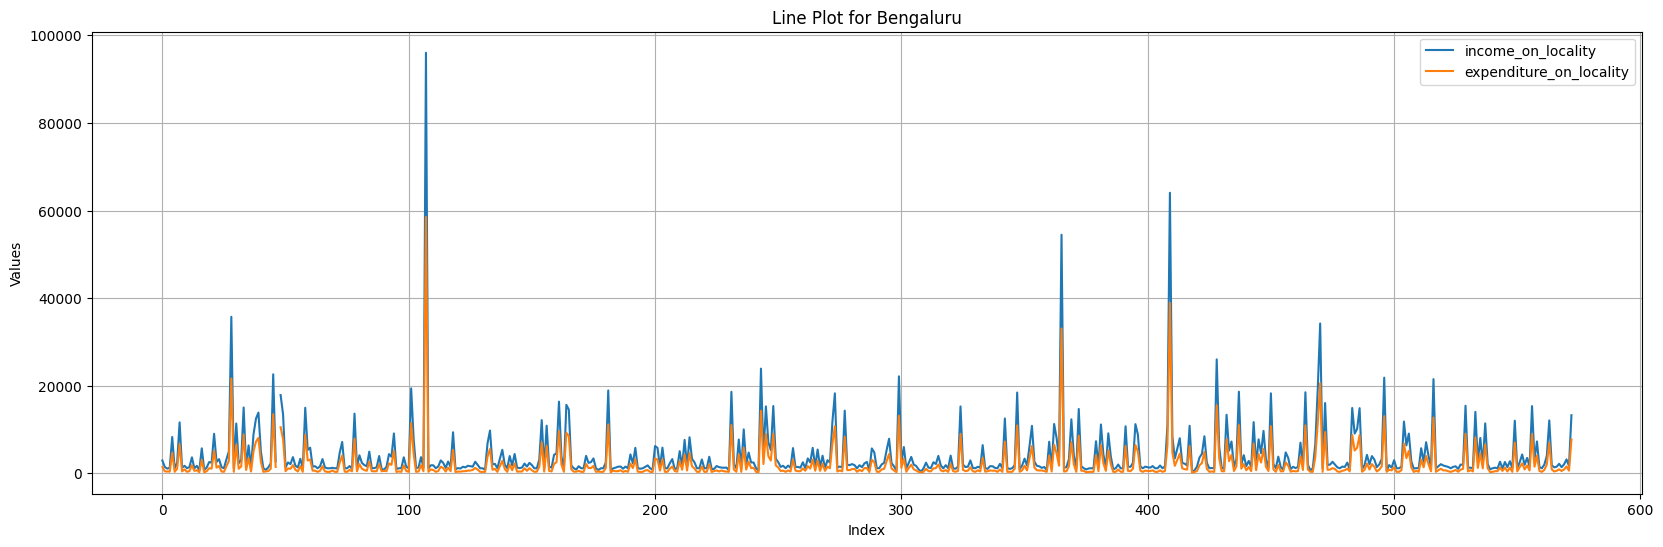

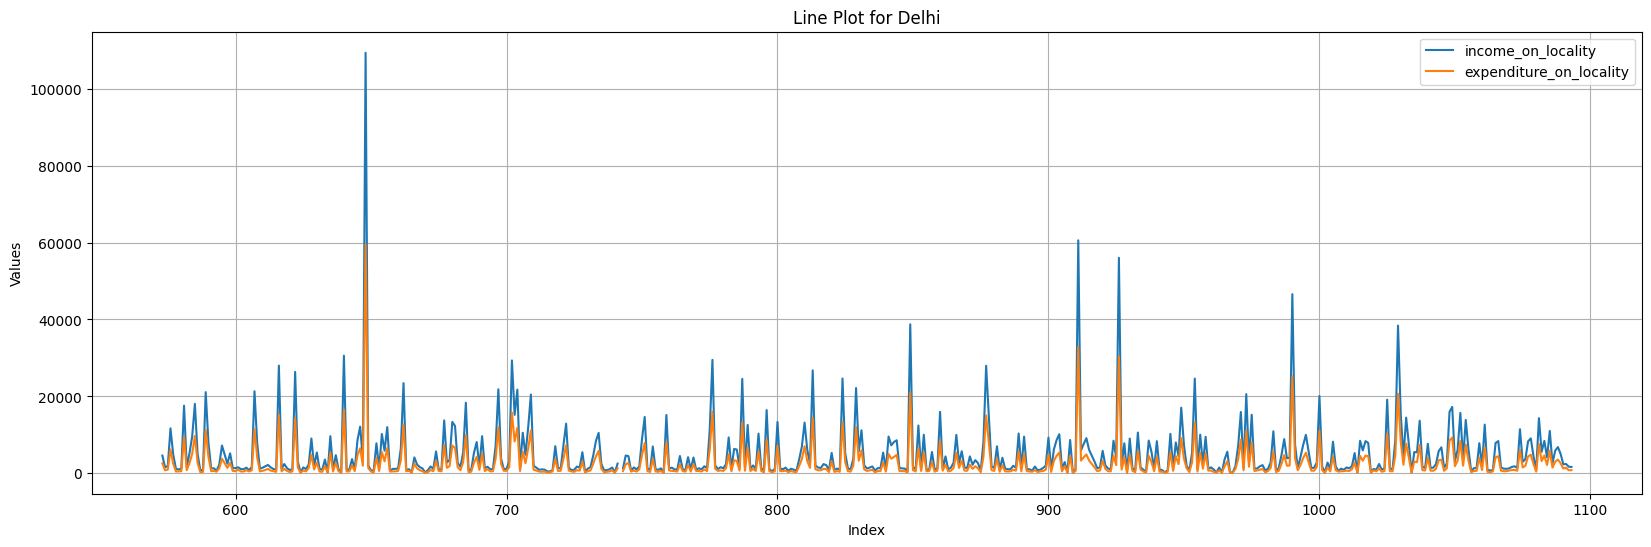

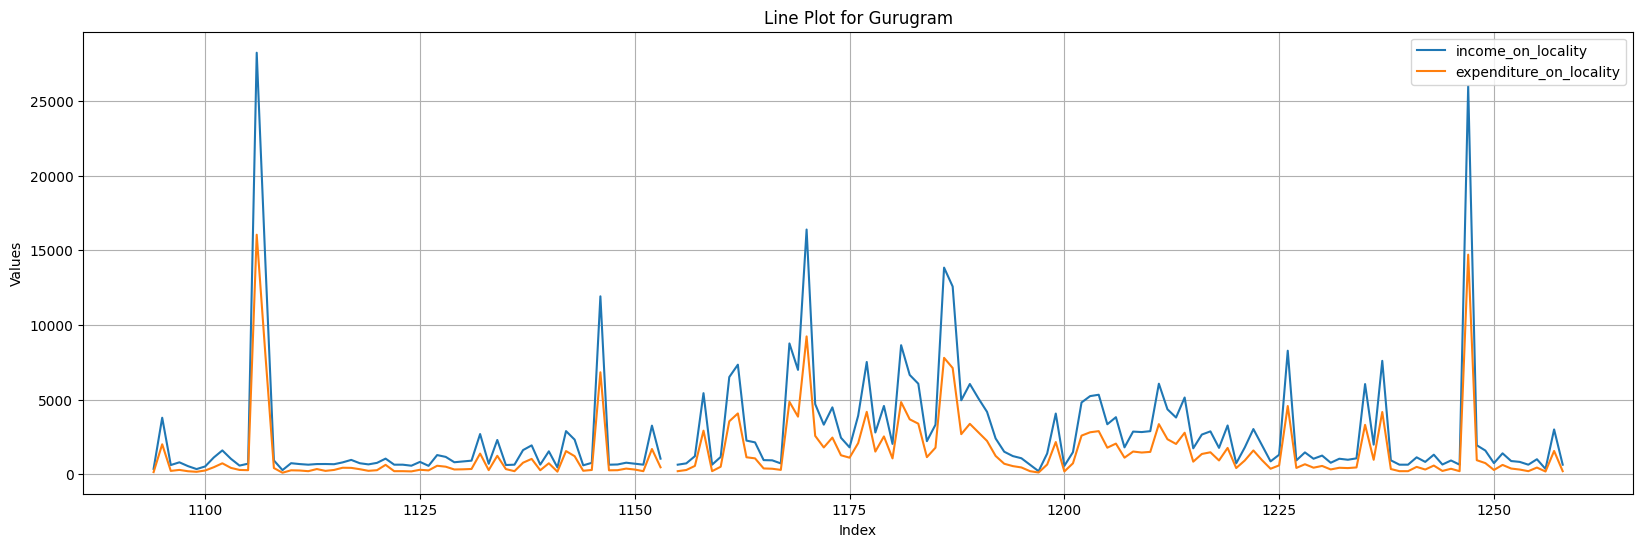

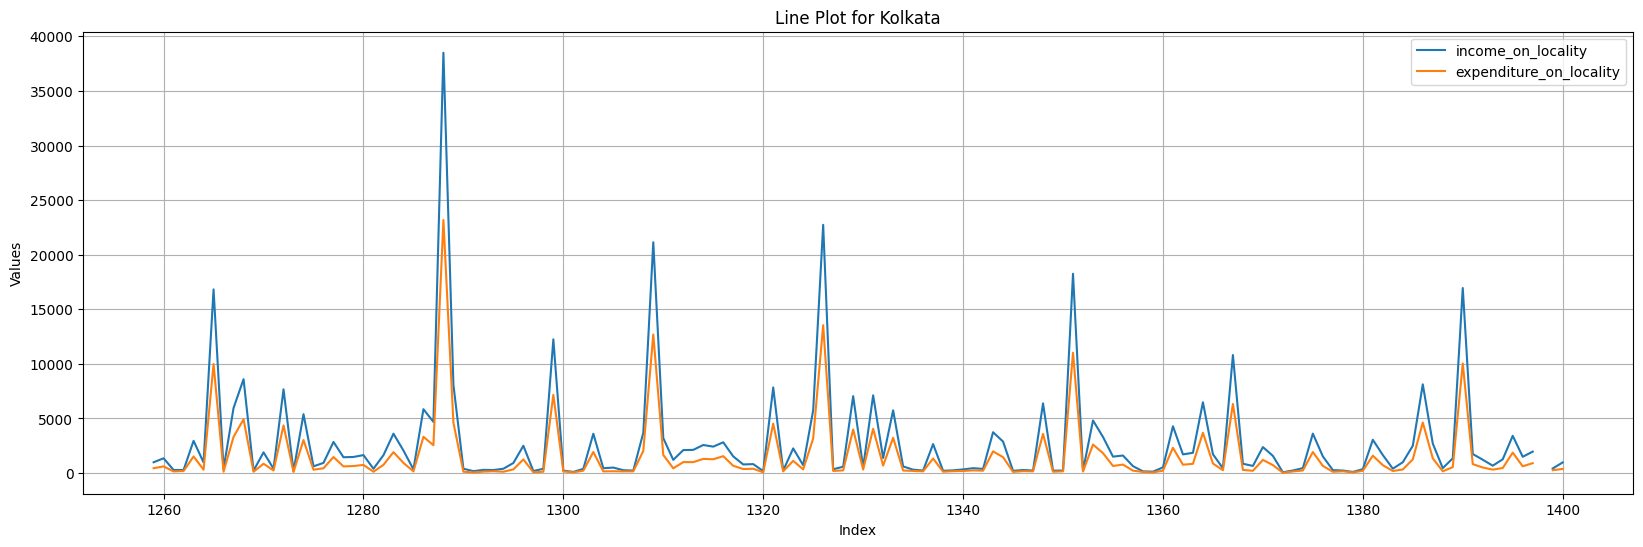

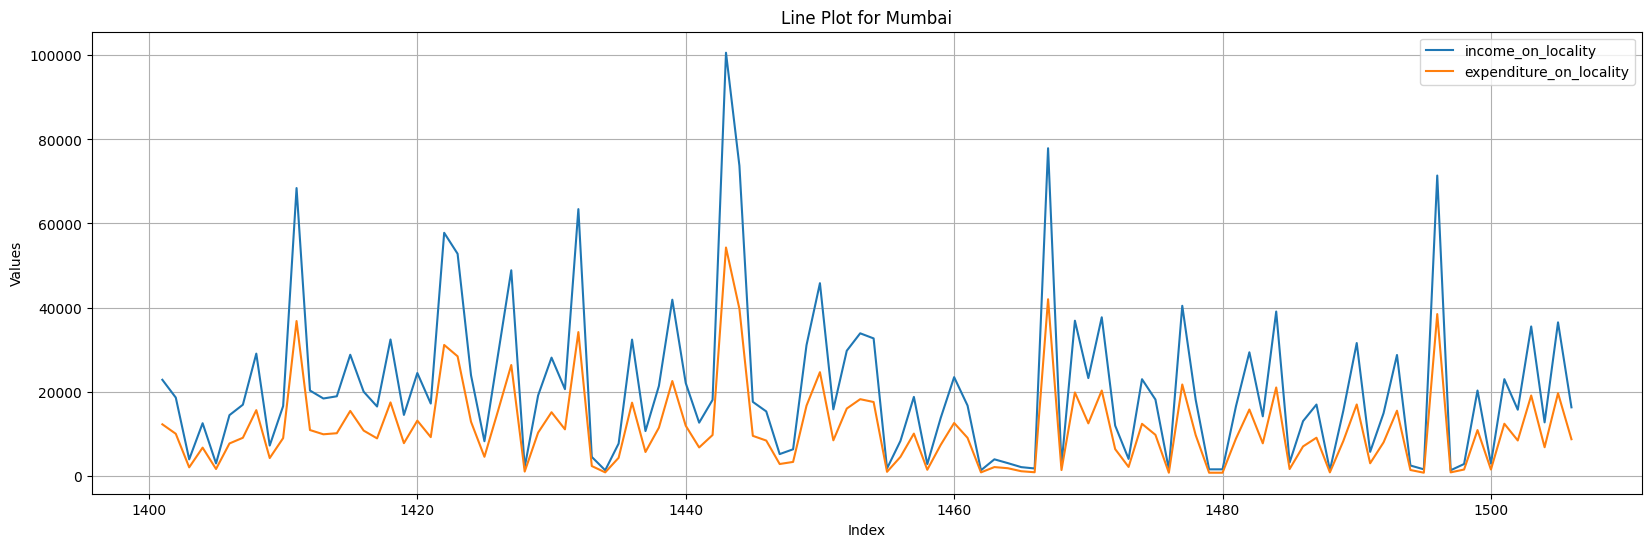

In [824]:
for i in df_plot_main['t_name'].unique():
    df_plot=df_plot_main[df_plot_main['t_name']==i]
    plt.figure(figsize=(20, 6)) 
    plt.plot(df_plot['income_on_locality'], label='income_on_locality')  
    plt.plot(df_plot['expenditure_on_locality'], label='expenditure_on_locality')  
    plt.xlabel('Index')  
    plt.ylabel('Values')  
    plt.title(f'Line Plot for {i}')  
    plt.legend()  
    plt.grid(True)  
    plt.show() 

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

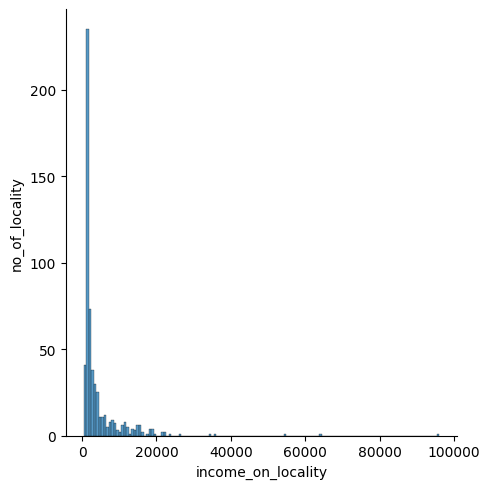

<Figure size 2000x600 with 0 Axes>

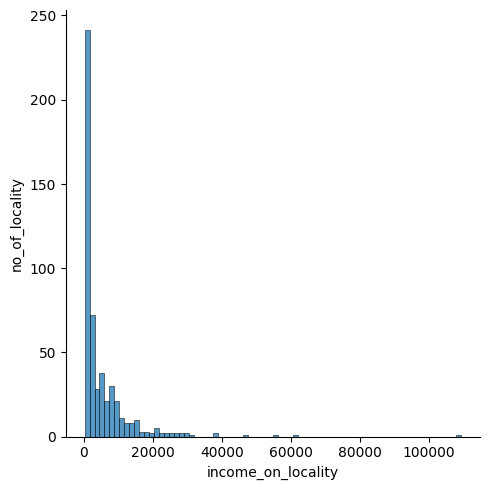

<Figure size 2000x600 with 0 Axes>

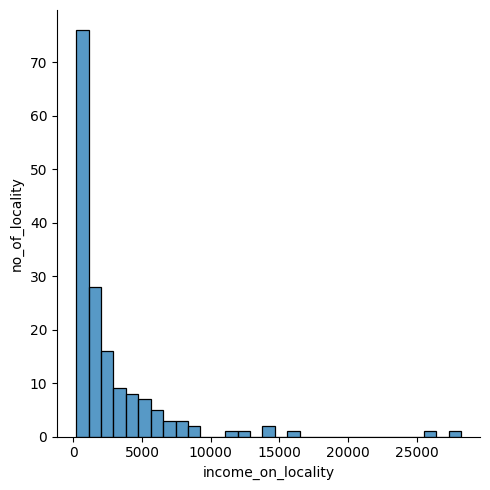

<Figure size 2000x600 with 0 Axes>

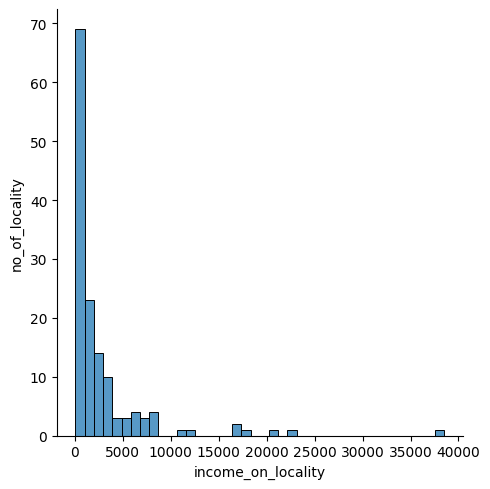

<Figure size 2000x600 with 0 Axes>

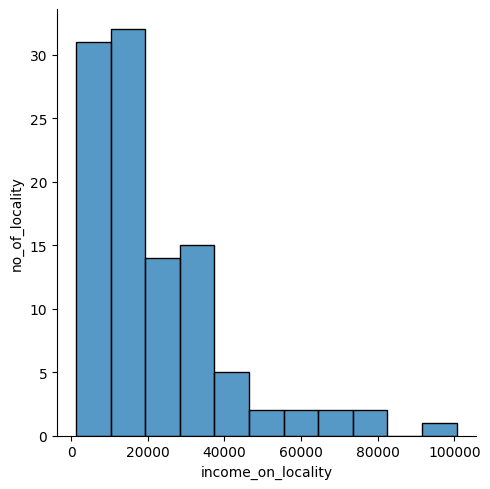

In [825]:
plt.figure(figsize=(20, 6))
for i in df_plot_main['t_name'].unique():
    df_plot=df_plot_main[df_plot_main['t_name']==i] 
    plt.figure(figsize=(20, 6))
    img=sns.displot(df_plot, x="income_on_locality")
    plt.ylabel("no_of_locality") 
    img.savefig(fr'C:\Users\chemi\Desktop\income_expenditure\distribution_plot\Plot image_{i}.png')

In [826]:
for i in df_plot_main['t_name'].unique():
    df_plot=df_plot_main[df_plot_main['t_name']==i]
    print('\n\n')
    print("-----",i,'------')
    print(df_plot[['income_on_locality','expenditure_on_locality','expenditue percentage']].describe())




----- Bengaluru ------
       income_on_locality  expenditure_on_locality  expenditue percentage
count           572.00000                572.00000              572.00000
mean           4223.60884               2254.26995               44.78283
std            6954.02932               4245.09100               10.00326
min             398.99760                151.10853               30.21235
25%            1201.31439                447.14882               35.45729
50%            1812.43703                783.22777               45.31241
75%            4012.17389               2112.21931               53.69943
max           96012.36756              58542.61942               69.15125



----- Delhi ------
       income_on_locality  expenditure_on_locality  expenditue percentage
count           520.00000                520.00000              520.00000
mean           5260.74919               2803.60992               52.00306
std            8426.45548               4577.69771              

In [827]:
# t-test for two column income and expenditue
# from scipy.stats import ttest_ind # for two independent varibale and if there is one attribute so we check sample with main population ttest_1samp
# for i in df_plot_main['t_name'].unique():
#     df_plot=df_plot_main[df_plot_main['t_name']==i].dropna()
#     df_plot['income_on_locality'].values
#     t_test,p_value=ttest_ind(a=df_plot['income_on_locality'].values,b=df_plot['expenditure_on_locality'].values,equal_var=False)
#     print("p-value",i , "{:.6f}".format(p_value))

p-value Bengaluru 0.000000
p-value Delhi 0.000000
p-value Gurugram 0.000236
p-value Kolkata 0.009930
p-value Mumbai 0.000005


In [1]:
#df_plot_main[['income_on_locality','expenditure_on_locality','increased expenditure','expenditue percentage','incre_expen_percentage']].describe()